# 賃貸マンションデータを用いたデータ加工・可視化の練習

賃貸マンションデータを用いたデータ加工・可視化の練習を行う。

Pandasにも簡単なプロット機能が備わっており、Seabornを使うことなく可視化することはできる。  
しかしながら少し動かしてみたところその機能は簡易的なものに留まっていると思われる。

そのため、機能性とデザイン性が総合的に優れているSeabornを用いる。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


練習に先立ち、グラフを綺麗に書くための「おまじない」を記述する。(詳細調査中)

In [2]:
plt.style.use("ggplot")
font = {"family": "meiryo"}
matplotlib.rc("font", **font)

CSVデータを読み込み、DataFrameオブジェクトに落とし込む。

In [3]:
df_room = pd.read_csv("data/chapter1/chapter/room.csv",
                      encoding="SHIFT-JIS")

df_room.head()

,近さ,家賃,間取り,大きさ,方角,築年数
0,B,68000,1K,19,西,12
1,B,68000,1K,19,南,12
2,B,69000,1K,19,北西,14
3,B,70000,1K,19,南,14
4,B,72000,1K,15,南,9


## ヒストグラム・散布図

家賃のヒストグラムをseabornを用いてプロットする。  
DataFrameオブジェクトのプロパティ名が読み込んだカラム名に対応してくれるのがすごい。

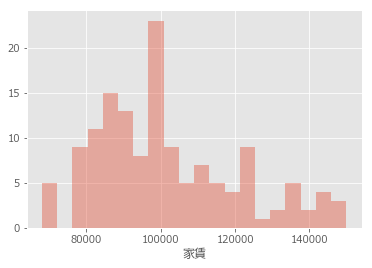

In [4]:
sns.distplot(df_room.家賃,
             bins=20,
             kde=False)

kdeは確率密度関数の表示オプションかと思われるが、縦軸の頻度の数値に課題が残る。

rugはトレログラムかと思われる。

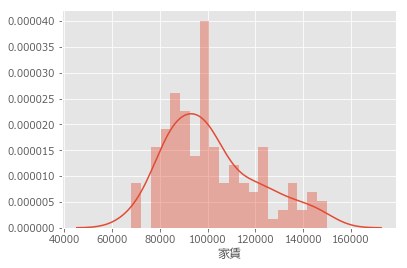

In [5]:
sns.distplot(df_room.家賃,
             bins=20,
             kde=True,
             rug=False)

Seabornではjointplotによりヒストグラムと散布図を同時に描いてくれる。  
比較的 低家賃・低スペースといった印象である。

pearsonrはなんだ？

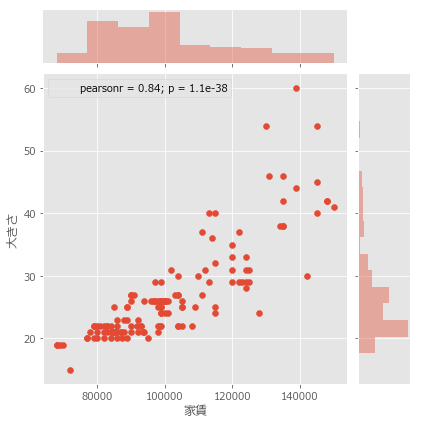

In [6]:
sns.jointplot(x="家賃",
              y="大きさ",
              data=df_room)

変数同士の相関をpairplotでみることができる。  
カテゴリカルデータに関してもhueオプションにより可視化してくれる。

大きさと家賃に強い相関がみられる。  
駅から遠い(B)のほうが、家賃の上昇に応じて広くなることがわかる。

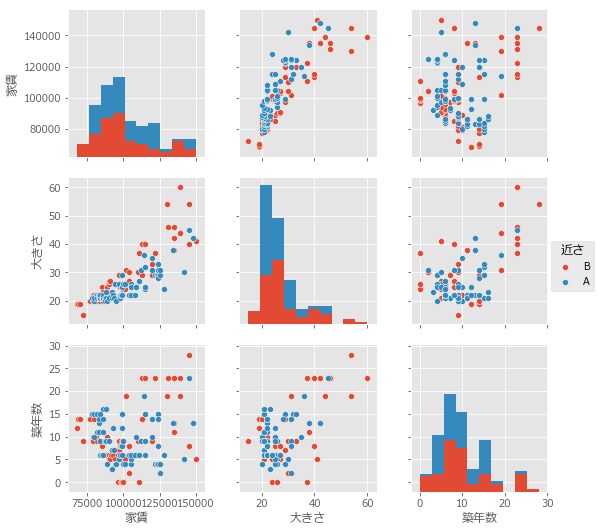

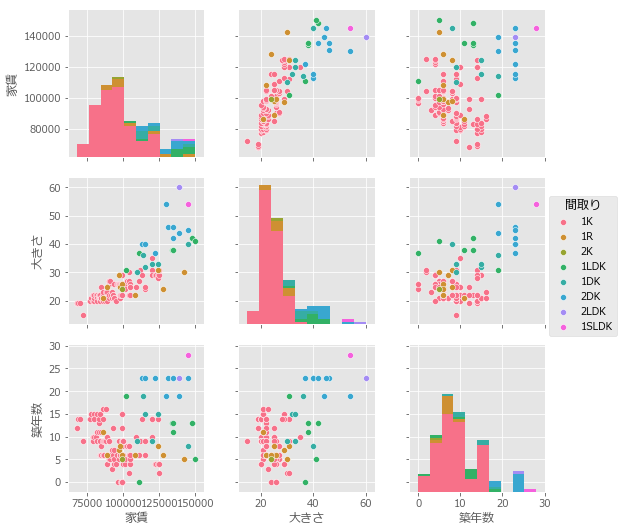

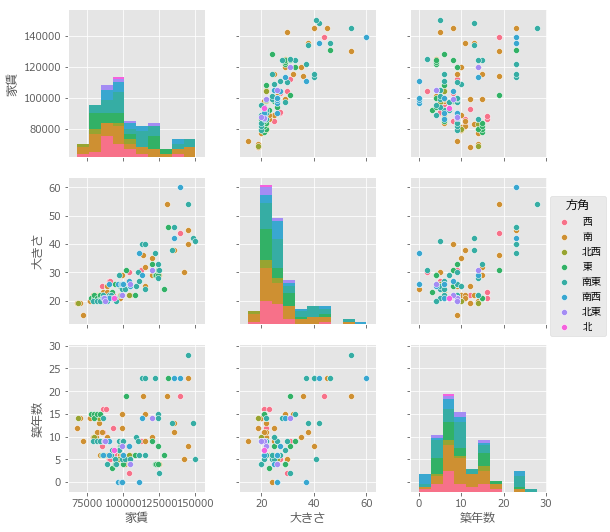

In [7]:
sns.pairplot(df_room,
             hue="近さ")

sns.pairplot(df_room,
             hue="間取り")

sns.pairplot(df_room,
             hue="方角")

## ヒートマップ

大きさと築年数が家賃にどのような影響をおよぼしているかをヒートマップを用いて調べる。

xに築年数、yに大きさとなるようなピボットテーブルを作成する。  
xに持っていきたい軸をindexに、yに持っていきたい軸をcolumnにもつようにする。

集計方法は平均を集計する。

In [10]:
df_room_pivot = pd.pivot_table(data=df_room,
                               values="家賃",
                               index="築年数",
                               columns="大きさ",
                               aggfunc=lambda x: np.average(x))

df_room_pivot.head()

大きさ,15,19,20,21,22,23,24,25,26,27,...,37,38,40,41,42,44,45,46,54,60
築年数,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,99000.0,NaN,98166.666667,NaN,...,111000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,92000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,92000.0,NaN,NaN,NaN,NaN,105000.0,100000.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,94000.0,NaN,NaN,100000.0,105000.0,97000.000000,90333.333333,...,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,NaN


heatmap関数を用いてピボットテーブルを可視化する。

築年数の数値が上にくることと、家賃が高くなるほど色が薄くなるのが直感に反するように思われるので、  
改善が必要である。
また、欠測値については0とすべきであるかもしれない。

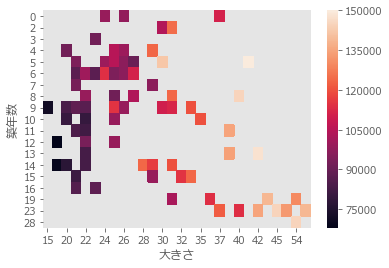

In [9]:
sns.heatmap(df_room_pivot)